# Sheet 7

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn

# 1) Log-sum-exp and softmax

(b)

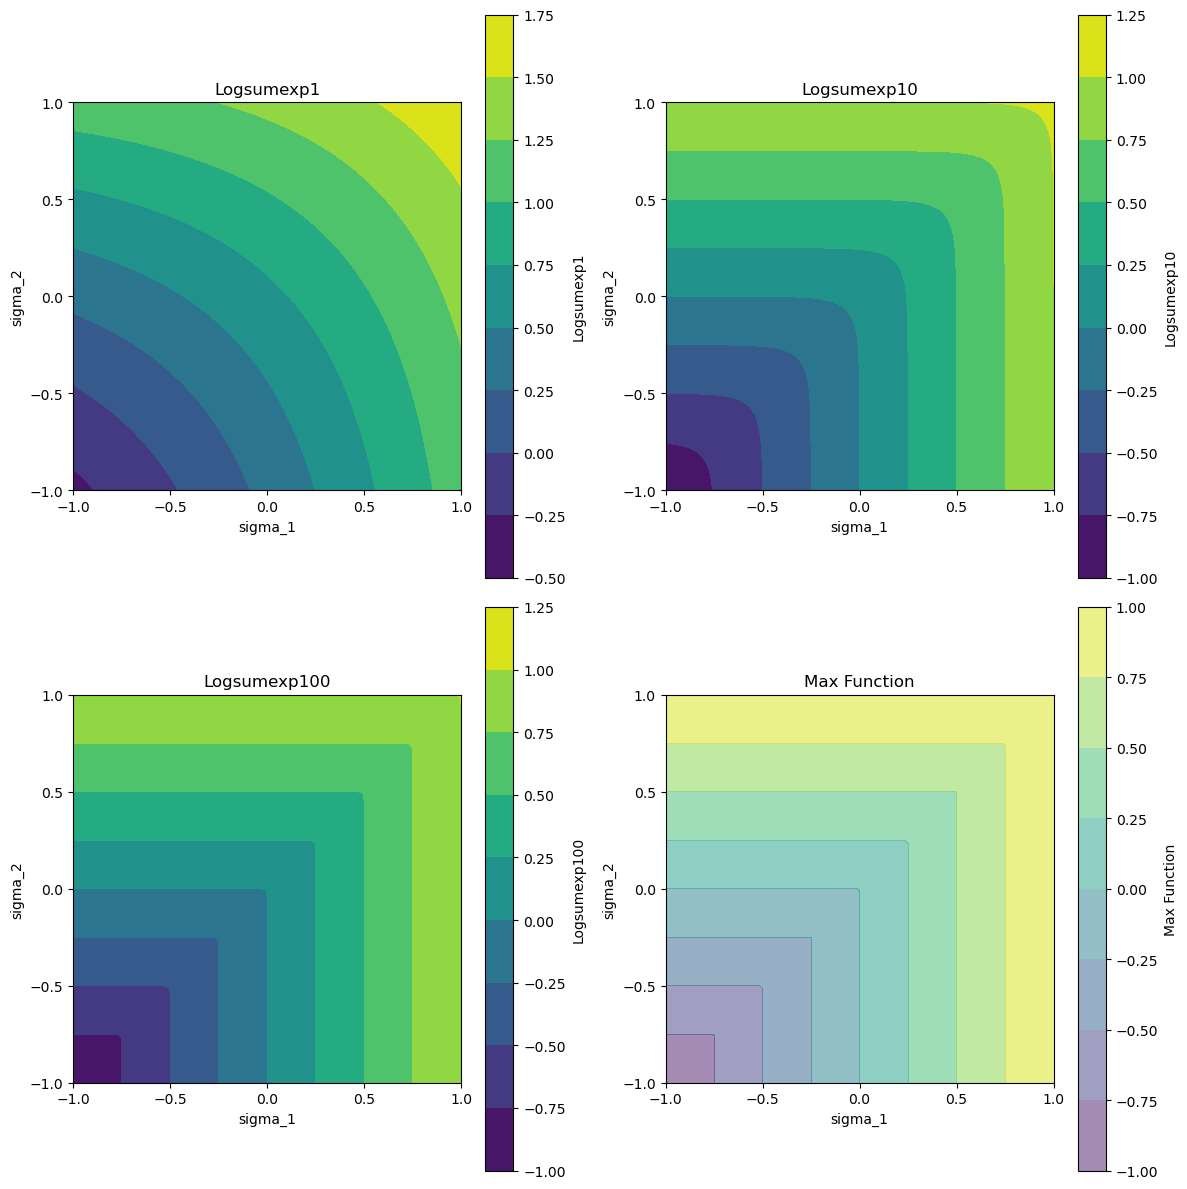

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def logsumexp(x, y, lamb=1):
    x_in = np.vstack((x.ravel(), y.ravel()))  # Verwende vstack, um die Koordinatenpaare zu erhalten
    return 1 / lamb * np.log(np.sum(np.exp(lamb * x_in), axis=0))  # Axis=0 für Summierung der Spalten

def max_function(x, y):
    return np.maximum(x, y)  # Berechnung des Elementweise-Maximums

# Grid erstellen
sig1_vals = np.linspace(-1, 1, 100)
sig2_vals = np.linspace(-1, 1, 100)
x, y = np.meshgrid(sig1_vals, sig2_vals)

# Logsumexp auf dem Grid auswerten
z_logsumexp1 = logsumexp(x, y)
z_logsumexp10 = logsumexp(x, y,10)
z_logsumexp100 = logsumexp(x, y,100)
# Maximalwert-Funktion auf dem Grid auswerten
z_max = max_function(x, y)

fig, ((ax1, ax3),(ax4,ax2)) = plt.subplots(2, 2, figsize=(12, 12))

# Contour-Plot für logsumexp
contour_logsumexp = ax1.contourf(x, y, z_logsumexp1.reshape(x.shape))
plt.colorbar(contour_logsumexp, ax=ax1, label="Logsumexp1")
ax1.set_xlabel("sigma_1")
ax1.set_ylabel("sigma_2")
ax1.set_aspect("equal")
ax1.set_xticks([-1, -0.5, 0, 0.5, 1])
ax1.set_yticks([-1, -0.5, 0, 0.5, 1])
ax1.set_title('Logsumexp1')

# Contour-Plot für Maximalwert-Funktion
contour_max = ax2.contourf(x, y, z_max, alpha=0.5, linestyles='dashed')
plt.colorbar(contour_max, ax=ax2, label="Max Function")
ax2.set_xlabel("sigma_1")
ax2.set_ylabel("sigma_2")
ax2.set_aspect("equal")
ax2.set_xticks([-1, -0.5, 0, 0.5, 1])
ax2.set_yticks([-1, -0.5, 0, 0.5, 1])
ax2.set_title('Max Function')

contour_logsumexp = ax3.contourf(x, y, z_logsumexp10.reshape(x.shape))
plt.colorbar(contour_logsumexp, ax=ax3, label="Logsumexp10")
ax3.set_xlabel("sigma_1")
ax3.set_ylabel("sigma_2")
ax3.set_aspect("equal")
ax3.set_xticks([-1, -0.5, 0, 0.5, 1])
ax3.set_yticks([-1, -0.5, 0, 0.5, 1])
ax3.set_title('Logsumexp10')

contour_logsumexp = ax4.contourf(x, y, z_logsumexp100.reshape(x.shape))
plt.colorbar(contour_logsumexp, ax=ax4, label="Logsumexp100")
ax4.set_xlabel("sigma_1")
ax4.set_ylabel("sigma_2")
ax4.set_aspect("equal")
ax4.set_xticks([-1, -0.5, 0, 0.5, 1])
ax4.set_yticks([-1, -0.5, 0, 0.5, 1])
ax4.set_title('Logsumexp100')

plt.tight_layout()
plt.show()


(c)

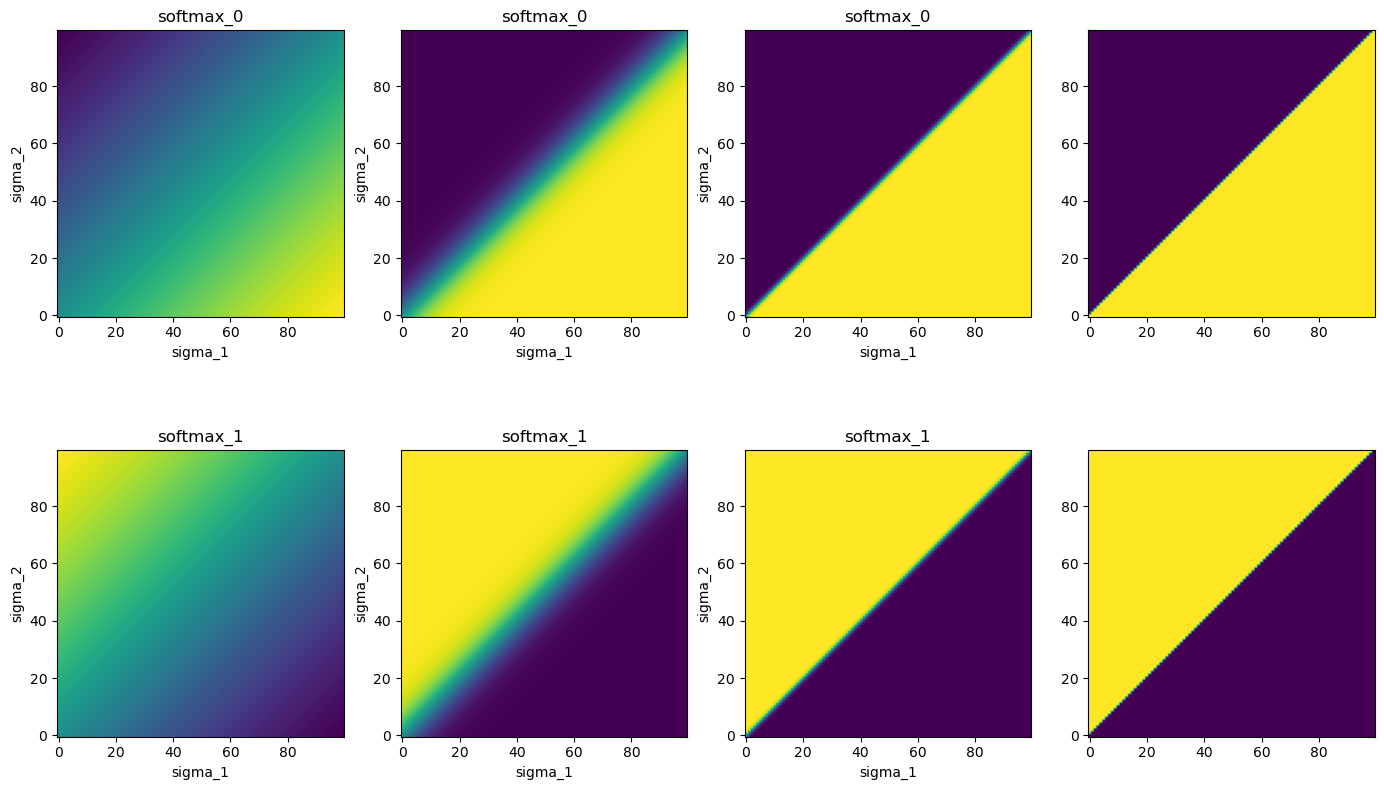

In [54]:
def softmax(x,y, lamb=1):
    # TODO: implement the softmax function. Axis should specify along which axis the sums should be computed.
    x_in = np.vstack((x.ravel(), y.ravel()))
    return np.exp(lamb*x_in)/np.sum(np.exp(lamb*x_in),axis=0)
sig1_vals = np.linspace(-1, 1, 100)
sig2_vals = np.linspace(-1, 1, 100)
x, y = np.meshgrid(sig1_vals, sig2_vals)
z1=softmax(x,y,1)   
z10=softmax(x,y,10)    
z100=softmax(x,y,100)
z_list=[z1,z10,z100]  
# TODO: compute the argmax of each gridpoint in one-hot form
def to_onehot_2d(i):
    output=np.zeros([2,len(i)])
    for j in range(len(i)):
        if i[j]==0:
            output[0][j]=1
        else:
            output[1][j]=1
    return output
onehot_argmax = to_onehot_2d(np.argmax(np.vstack((x.ravel(), y.ravel())), axis=0))

# TODO: make the plots as specified on the sheet (nicest is in a grid which you can get using plt.subplots)
def plot_axs(ax,z,i):
    ax.imshow(z[i].reshape(100,100), origin='lower')
    ax.set_xlabel("sigma_1")
    ax.set_ylabel("sigma_2")
    ax.set_aspect("equal")
    ax.set_title('softmax_'+str(i))
# plot the softmax
fig, axs = plt.subplots(2, 4, figsize=(17, 10))
        
# plot the onehot argmax
for i in range(3):
    for j in range(2):
        plot_axs(axs[j][i],z_list[i],j)
axs[0][3].imshow(onehot_argmax[0].reshape(100,100), origin='lower')
axs[1][3].imshow(onehot_argmax[1].reshape(100,100), origin='lower')


In [37]:
k=to_onehot_2d(np.argmax(np.vstack((x.ravel(), y.ravel())), axis=0))

In [46]:
k=np.argmax(np.vstack((x.ravel(), y.ravel())), axis=0)

In [51]:
k

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

# 2) Top tagging with Point Clouds

See https://github.com/heidelberg-hepml/ml-tutorials for solutions

# 3) CNNs for Galaxy Classification

In [1]:
import h5py
import numpy as np
import torch

label_names = [
    'Disk, Face-on, No Spiral',
    'Smooth, Completely round',
    'Smooth, in-between round',
    'Smooth, Cigar shaped',
    'Disk, Edge-on, Rounded Bulge',
    'Disk, Edge-on, Boxy Bulge',
    'Disk, Edge-on, No Bulge',
    'Disk, Face-on, Tight Spiral',
    'Disk, Face-on, Medium Spiral',
    'Disk, Face-on, Loose Spiral'
]
n_classes = len(label_names)

# To get the images and labels from file
with h5py.File('Galaxy10.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])
images = images.astype(np.float32)

# comply to (batch, channel, height, width) convention of pytorch
images = np.moveaxis(images, -1, 1)  
# convert to torch
images = torch.from_numpy(images)
labels = torch.from_numpy(labels)

print(f'{images.shape=}, {labels.shape=}')

print(labels.shape, images.shape)
# TODO: print the number of samples for each class

images.shape=torch.Size([21785, 3, 69, 69]), labels.shape=torch.Size([21785])
torch.Size([21785]) torch.Size([21785, 3, 69, 69])


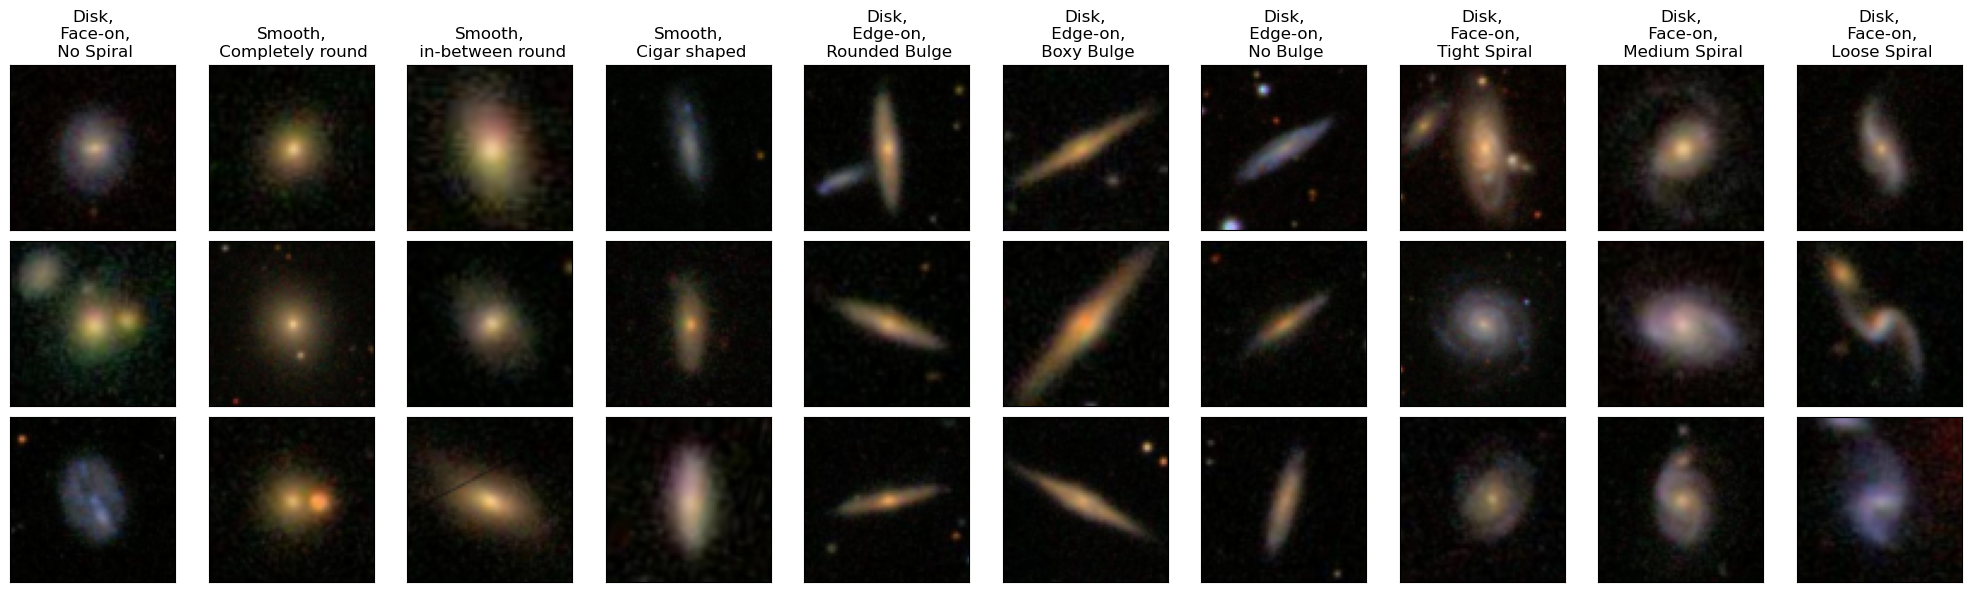

In [2]:
from matplotlib import pyplot as plt

# TODO: plot some samples of each class
itemindex = torch.where(labels == 3)
itemindex[:3]

samples_per_class = 3
fig, axss = plt.subplots(samples_per_class, n_classes, figsize=(n_classes * 2, samples_per_class * 2))
for label, (label_name, axs) in enumerate(zip(label_names, axss.T)):
    idx = torch.where(labels==label)[0][:samples_per_class] # take samples_per_class first occurences
    for i, (ind, ax) in enumerate(zip(idx, axs)):
        ax.imshow(images[ind].long().moveaxis(0, -1))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == 0:
            ax.set_title(label_name.replace(',',',\n'))
plt.tight_layout()
plt.show()

In [3]:
from torchvision.transforms import Normalize

# TODO: Compute the mean and standard deviation per channel over the dataset

# stds = images.moveaxis(1, 0).reshape(3, -1).std(axis=1)
# means = images.moveaxis(1, 0).reshape(3, -1).mean(axis=1)
stds, means = torch.tensor([37.5412, 31.3756, 26.3283]), torch.tensor([27.7014, 23.8241, 18.1425])
print(stds, means)

# TODO: Normalize the images
normalize = Normalize(means, stds)
images_normalized = normalize(images)

tensor([37.5412, 31.3756, 26.3283]) tensor([27.7014, 23.8241, 18.1425])


In [4]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

n_samples = len(labels)

# TODO: split the data in training and validation sets, stratifying by the labels
train_idx, val_idx = train_test_split(np.arange(n_samples), test_size=0.1, stratify=labels)

# TODO: create pytorch datasets for training and validation
train_dataset = TensorDataset(images_normalized[train_idx].float(), labels[train_idx].long())
val_dataset = TensorDataset(images_normalized[val_idx].float(), labels[val_idx].long())

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [33]:
import torch.nn as nn
import torch.nn.functional as F

#TODO: implement a small CNN as specified on the sheet
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=3,out_channels=8,kernel_size=5,padding=1)
        self.conv2 = torch.nn.Conv2d(in_channels=8,out_channels=16,kernel_size=5,padding=1)
        self.maxpool=torch.nn.MaxPool2d(kernel_size=8,stride=5,padding=1)
        self.relu=torch.nn.ReLU()
        self.linear_1=torch.nn.Linear(64,64)
        self.linear_2=torch.nn.Linear(64,32)
        self.linear_3=torch.nn.Linear(32,10)
        self.sigmoid=torch.nn.Sigmoid()
    def forward(self,x):
        x=self.conv1(x)
        x=self.relu(x)
        x=self.maxpool(x)
        x=self.conv2(x)
        x=self.relu(x)
        x=self.maxpool(x)
        x=torch.flatten(x,1)
        x=self.linear_1(x)
        x=self.relu(x)
        x=self.linear_2(x)
        x=self.relu(x)
        x=self.linear_3(x)
        x=self.sigmoid(x)
        return x



(b)

In [39]:
# TODO: create DataLoaders for train and val, use a batch size of 16

# TODO: instantiate the model, optimizer and criterion
model=CNN()
optimizer=torch.optim.AdamW(model.parameters(),lr=0.001,weight_decay=0.001)
criterion=torch.nn.CrossEntropyLoss()
# TODO: implement the training loop, validating after every epoch, and make the requested plots
def train_epoch(optimizer=optimizer, criterion=criterion, train_loader=train_loader, val_loader=val_loader, model=model,train_losses=[],val_losses=[]):
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    loss_val = []
    model.eval()
    for x, y in val_loader:
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss_val.append(loss.item())
    val_losses.append(np.mean(loss_val))
    return train_losses, val_losses
n_epochs = 20
train_losses, val_losses = [], []
for epoch in range(n_epochs):
    train_losses, val_losses = train_epoch(train_losses=train_losses, val_losses=val_losses)
    print(f'Epoch {epoch+1}/{n_epochs}: train_loss {train_losses[-1]:.4f}, val_loss {val_losses[-1]:.4f}')





    
from sklearn.metrics import confusion_matrix


Epoch 1/20: train_loss 1.7076, val_loss 1.8780


KeyboardInterrupt: 

In [34]:
# TODO: create DataLoaders for train and val, use a batch size of 16

# TODO: instantiate the model, optimizer and criterion
model=CNN()
optimizer=torch.optim.AdamW(model.parameters(),lr=0.001,weight_decay=0.001)
criterion=torch.nn.CrossEntropyLoss()
# TODO: implement the training loop, validating after every epoch, and make the requested plots
def train_epoch(optimizer=optimizer, criterion=criterion, train_loader=train_loader, val_loader=val_loader, model=model,train_losses=[],val_losses=[]):
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    loss_val = []
    model.eval()
    for x, y in val_loader:
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss_val.append(loss.item())
    val_losses.append(np.mean(loss_val))
    return train_losses, val_losses
n_epochs = 20
train_losses, val_losses = [], []
for epoch in range(n_epochs):
    train_losses, val_losses = train_epoch(train_losses=train_losses, val_losses=val_losses)
    print(f'Epoch {epoch+1}/{n_epochs}: train_loss {train_losses[-1]:.4f}, val_loss {val_losses[-1]:.4f}')





    
from sklearn.metrics import confusion_matrix


Epoch 1/20: train_loss 1.8350, val_loss 1.8839
Epoch 2/20: train_loss 1.6891, val_loss 1.8500
Epoch 3/20: train_loss 1.6798, val_loss 1.7824
Epoch 4/20: train_loss 1.6553, val_loss 1.7706
Epoch 5/20: train_loss 1.7561, val_loss 1.7713
Epoch 6/20: train_loss 2.0897, val_loss 1.7629
Epoch 7/20: train_loss 1.9994, val_loss 1.7659
Epoch 8/20: train_loss 1.6182, val_loss 1.7689
Epoch 9/20: train_loss 1.6157, val_loss 1.7804
Epoch 10/20: train_loss 1.7847, val_loss 1.7642
Epoch 11/20: train_loss 1.6181, val_loss 1.7530
Epoch 12/20: train_loss 1.7122, val_loss 1.7769
Epoch 13/20: train_loss 1.9690, val_loss 1.7735
Epoch 14/20: train_loss 1.7952, val_loss 1.7465
Epoch 15/20: train_loss 1.6172, val_loss 1.7549
Epoch 16/20: train_loss 1.8248, val_loss 1.7510
Epoch 17/20: train_loss 1.6581, val_loss 1.7600


KeyboardInterrupt: 

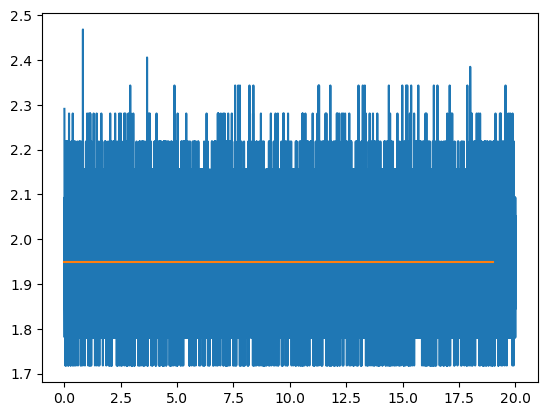

In [25]:
plt.plot(np.arange(len(train_losses)) / len(train_loader), train_losses)
plt.plot(np.arange(len(val_losses)), val_losses)
plt.show()

(c)

In [ ]:
# TODO: redo (c) with a ResNet
# Hint: Training is probably quicker on google colab (https://colab.research.google.com/)



In [14]:
15*16

240